In [1]:
from numpy import *
from GRpy.all import *
init_printing()
#init_printing(use_latex='mathjax')

In [2]:
t, x0, r, th, phi = symbols('t, x^0, R, theta, varphi', positive=True, real=True)
m, a, M = symbols('m, a, M', positive = True)
S = Symbol('S', real=True)

In [3]:
sigma = r**2 + (a*cos(th))**2
delta = r**2 - 2*m*r + a**2

In [4]:
g = Metric((x0, r, th, phi))
g[-0,-0] = (1-(2*m*r/sigma))
g[-0,-1] = 0
g[-0,-2] = 0
g[-0,-3] = (2*a*m*r*sin(th)**2)/sigma
g[-1,-0] = 0
g[-1,-1] = -sigma/delta
g[-1,-2] = 0
g[-1,-3] = 0
g[-2,-0] = 0
g[-2,-1] = 0
g[-2,-2] = -sigma
g[-2,-3] = 0
g[-3,-0] = (2*a*m*r*sin(th)**2)/sigma
g[-3,-1] = 0
g[-3,-2] = 0
g[-3,-3] = -(r**2 +a**2 + (2*a**2*m*r*sin(th)**2)/sigma)*sin(th)**2

In [5]:
ginv = g.invert()
chris = Christoffel(g)

In [6]:
def dw(A,mu):
    downvector=0
    for nu in range(4):
        downvector += g.components[(-mu,-nu)]*A[nu]
    
    return simplify(downvector.subs(th,pi/2))

def down(A):
    return [dw(A,mu) for mu in range(4)]

In [7]:
pup = [M*(m+r)/sqrt(r**2+a**2-2*m*r), 0, 0, M*m/(a*sqrt(r**2+a**2-2*m*r))]
sup = [0, 0, -M*r/a, 0]
uup = [(a**2+r**2)/(r*sqrt(a**2+r**2-2*m*r)), 0, 0, a/(r*sqrt(a**2+r**2-2*m*r))]
pdown = down(pup)
sdown = down(sup)
udown = down(uup)

def lcup(i,j,k,l):
    return -LeviCivita(i,j,k,l)/(r**2)

def tensorspin(mu,nu):
    tensorspin=0
    for rho in range(4):
        for delta in range(4):
            tensorspin+=lcup(mu,nu,rho,delta)*sdown[rho]*udown[delta]
            
    return simplify(tensorspin)

def pint(A,B):
    pint=0
    for mu in range(4):
        pint += A[mu]*B[mu]
        
    return simplify(pint)

masap = sqrt(pint(pup,pdown))

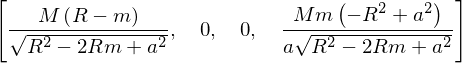

In [8]:
pdown

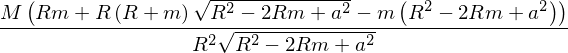

In [9]:
E = sqrt(delta/sigma)*pup[0] + a*sin(th)/sqrt(sigma)*pup[3] + m*(r**2-a**2*cos(th)**2)*tensorspin(1,0)/(sigma**2)
Energia = simplify(E.subs(th,pi/2.))
Energia

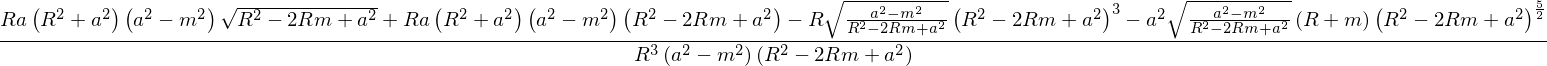

In [10]:
J = a*sin(th)**2*sqrt(delta/sigma)*uup[0] + ((r**2+a**2)*sin(th)/sqrt(sigma))*uup[3] + a*sin(th)**2*((r-m)*sigma+2*m*r**2)*tensorspin(1,0)/(sigma**2*masap) + r*sqrt(delta)*sin(th)*tensorspin(1,3)/(sigma*masap)
MomentoAngular = simplify(J.subs(th,pi/2.))
MomentoAngular